# TP SGD

## Toy Dataset

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model

### 1) On considère ici la perte quadratique $l(a,b) = (a - b)^2$ 
Calculer $ \frac{\partial l}{\partial x_{1}} $

$$ l = a - b $$

### 2) & 3) & 5) Implémenter l'algorithme SGD

In [24]:
def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse",alpha =0, average=False):
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if average is True:
        raise NotImplementedError('QUESTION ??')

    if alpha > 0:
        raise NotImplementedError('QUESTION ??')

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return gamma
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
            gradient = X[idx, :] * (np.dot(X[idx], w) - y[idx])
        elif loss == "hinge":
            raise NotImplementedError('QUESTION ?')
        w -= gamma_func(t) * gradient
        all_w[t] = w
    return w, all_w, pobj




In [25]:
def gamma(t):
    return 1. / (100 + t)
n_samples = 1000
n_features = 100
n_iter = 1000  # number of iterations
gamma = 0.01  # step size
X_toy = np.random.randn(n_samples, n_features)
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target)
w_ini = np.zeros(X_toy.shape[1] + 1)
w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini, loss='mse',  alpha=0, average=False)

### 4) Afficher l'évolution de la valeur de l'objectif en fonction du nombre d'itérations, ie $$ \frac{1}{n}\sum{l(f_{w}(X_{i},y_{i}))} $$

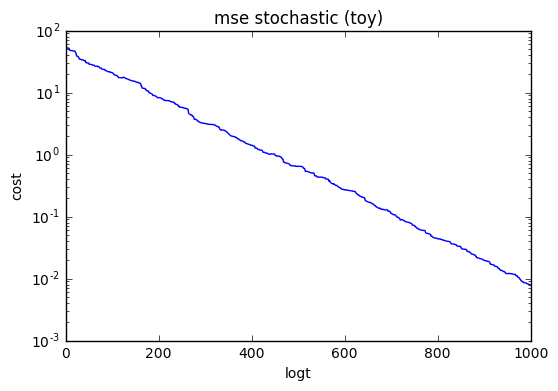

In [39]:
plt.figure()
plt.plot(pobj)
plt.yscale('log')
plt.xlabel('logt')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % 'mse')
plt.show()

### 6) 

In [74]:
def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse",alpha =0, average=False):
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return gamma
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2) + alpha/2 * np.linalg.norm(w)**2
            gradient = X[idx, :] * (np.dot(X[idx], w) - y[idx]) + alpha * w
        elif loss == "hinge":
            raise NotImplementedError('QUESTION ?')
        w -= gamma_func(t) * gradient
        all_w[t] = w
    return w, all_w, pobj

In [75]:
n_samples = 1000
n_features = 100
n_iter = 1000  # number of iterations
gamma = 0.01  # step size
X_toy = np.random.randn(n_samples, n_features)
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target)
w_ini = np.zeros(X_toy.shape[1] + 1)
w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini, loss='mse',  alpha=0.01, average=False)

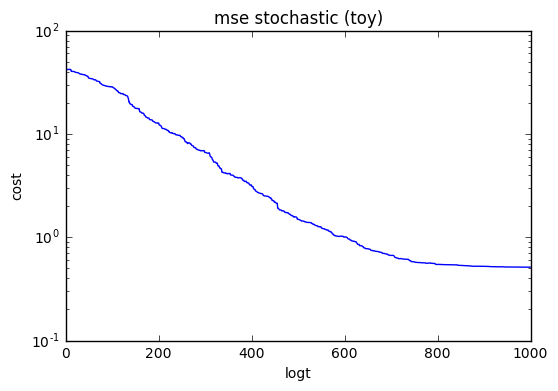

In [76]:
plt.figure()
plt.plot(pobj)
plt.yscale('log')
plt.xlabel('logt')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % 'mse')
plt.show()

### 7) 

On peut faire diminuer encore plus la fonction ojectif avec un pas  non constant, cependant le poids accordé aux nouvelles données ne sera pas le même que ceux des "premières" données ainsi le minimum obtenu pour les nouvelles données risque de ne pas avoir de sens

## Exemple sur données synthétiques

In [68]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Make the problem binary
X = X[y < 2]
y = y[y < 2]
y[y == 0] = -1
X = X[:, :2]

def plot_2d(X, y, w=None):
    """ Plot in 2D the dataset data, colors and symbols according to the
    class given by the vector y (if given); the separating hyperplan w can
    also be displayed if asked"""
    plt.figure()
    symlist = ['o', 's', '+', 'x', 'D', '*', 'p', 'v', '-', '^']
    collist = ['blue', 'red', 'purple', 'orange', 'salmon', 'black', 'grey',
               'fuchsia']

    labs = np.unique(y)
    idxbyclass = [y == labs[i] for i in range(len(labs))]

    for i in range(len(labs)):
        plt.plot(X[idxbyclass[i], 0], X[idxbyclass[i], 1], '+',
                 color=collist[i % len(collist)], ls='None',
                 marker=symlist[i % len(symlist)])
    plt.ylim([np.min(X[:, 1]), np.max(X[:, 1])])
    plt.xlim([np.min(X[:, 0]), np.max(X[:, 0])])
    mx = np.min(X[:, 0])
    maxx = np.max(X[:, 0])
    if w is not None:
        plt.plot([mx, maxx], [mx * -w[1] / w[2] - w[0] / w[2],
                              maxx * -w[1] / w[2] - w[0] / w[2]],
                 "g", alpha=1.)
    plt.show()

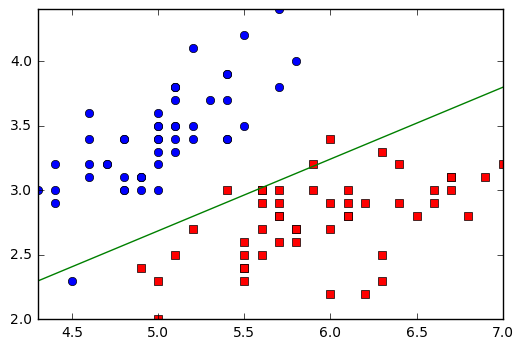

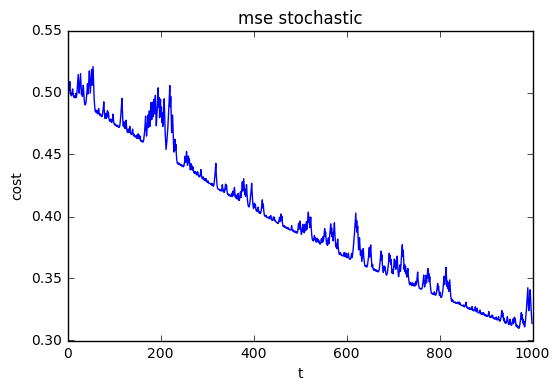

In [81]:
gamma = 0.001  # step size
n_iter = 1000  # number of iterations
alpha = 0.01
loss = 'mse'
# loss = 'hinge'  # QUESTION 4

# Initialize w with just zeros
w_ini = np.zeros(X.shape[1] + 1)

w, all_w, pobj = stochastic_gradient(X, y, gamma, n_iter, w_ini, loss=loss)

plot_2d(X, y, w)
plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic' % loss)
plt.show()

### 9) Ajouter l'étape de moyennage optionnelle

In [90]:
def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse",alpha=0):
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    w_avg = w_ini.copy()
    pobj = np.zeros(n_iter)
    pobj_avg = np.zeros(n_iter)
    t0 = n_samples   # average only the after one epoch
    if not callable(gamma):
        def gamma_func(t):
            return gamma
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
            pobj_avg[t] = 0.5 * np.mean((y - np.dot(X, w_avg)) ** 2)
            if alpha > 0:
                pobj[t] += 0.5 * np.dot(w, w)
                pobj_avg[t] += 0.5 * np.dot(w_avg, w_avg)
            gradient = X[idx, :] * (np.dot(X[idx], w) - y[idx])
        elif loss == "hinge":
            hinge_loss = np.maximum(0., 1. - y * np.dot(X, w))
            hinge_loss_avg = np.maximum(0., 1. - y * np.dot(X, w_avg))
            pobj[t] = np.mean(hinge_loss)
            pobj_avg[t] = np.mean(hinge_loss_avg)
            gradient = X[idx] * (-y[idx] * (hinge_loss[idx] > 0.))
        if alpha > 0:
            gradient += alpha * w
        w -= gamma_func(t) * gradient
        mu = 1. / np.maximum(1, t - t0)
        w_avg = w_avg + mu * (w - w_avg)
        # w_avg = float(t) / (t + 1) * w_avg + 1. / (t + 1) * w
        all_w[t] = w

    return w, w_avg, all_w, pobj, pobj_avg

## Comparaison avec Scikit-learn

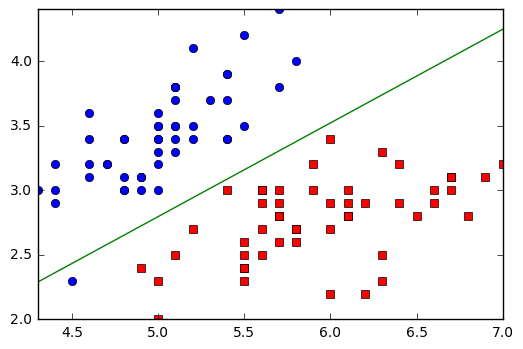

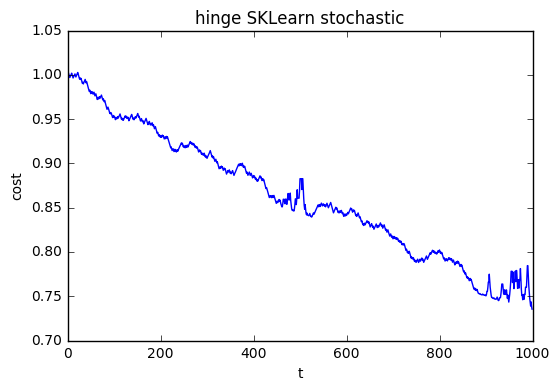

In [110]:
gamma = 0.01  # step size
n_iter = 1000  # number of iterations
alpha = 0.5
loss = 'hinge'
clf = linear_model.SGDClassifier(loss='hinge', penalty='l2',n_iter=n_iter, shuffle=True,learning_rate='constant',
                                 eta0=gamma)
clf.fit(X, y)
plot_2d(X, y, np.c_[clf.intercept_, clf.coef_][0])

plt.figure()
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s SKLearn stochastic' % 'hinge')
plt.plot(pobj)
plt.show()

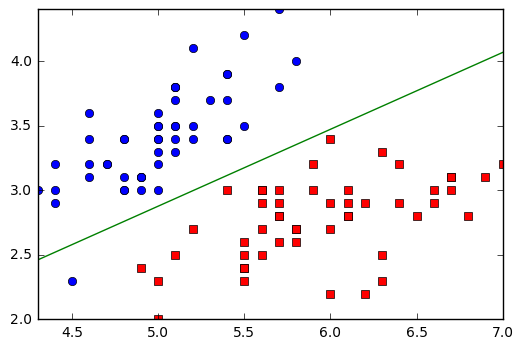

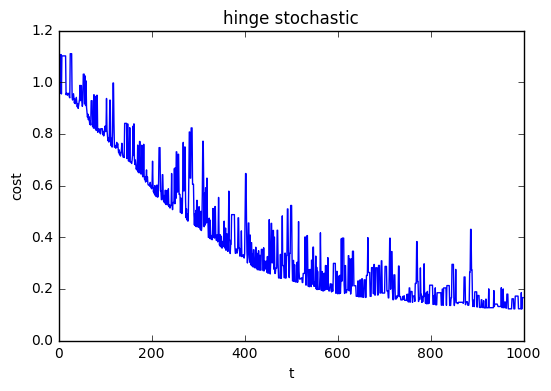

In [116]:
w, w_avg, all_w, pobj, pobj_avg = stochastic_gradient(X, y, gamma, n_iter, w_ini, loss=loss)

plot_2d(X, y, w_avg)
plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic' % loss)
plt.show()